## Import Libraries

In [20]:
!pip install tf_keras


In [3]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data preprocessing

### Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(##image loading
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,#if have to increase the the speed of the trainning
    image_size=(128, 128),
    shuffle=True,#at the time of feeding to avoid baisness
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation image preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",#take all the label from directory
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,#at a time model is feeding 32 images at a time
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set #(128,128) showing size of the image and (3) is showing rgb image

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

## To avoid Overshooting Loss function

#### 1.Choose small learning rate default 0.001 here we have taken 0.0001
#### 2.There may be chance of underfitting so increase number of neuron
#### 3.Add more Convolutional Layer to extract more feature from images 
####  there may be possibilty that model unable to capture relevant feature
####  or model is confusing due to lack of feature so feed with more feature.

## Building Model

In [7]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\python3.11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [17]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

## Compiling and Training Phase

In [24]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3272s 1s/step - accuracy: 0.3832 - loss: 2.2021 - val_accuracy: 0.8290 - val_loss: 0.5311
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2323s 1s/step - accuracy: 0.8355 - loss: 0.5240 - val_accuracy: 0.9178 - val_loss: 0.2608
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2282s 1s/step - accuracy: 0.9073 - loss: 0.2884 - val_accuracy: 0.9404 - val_loss: 0.1896
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2790s 1s/step - accuracy: 0.9387 - loss: 0.1889 - val_accuracy: 0.9469 - val_loss: 0.1661
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2777s 1s/step - accuracy: 0.9523 - loss: 0.1424 - val_accuracy: 0.9578 - val_loss: 0.1287
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2180s 992ms/step - accuracy: 0.9643 - loss: 0.1064 - val_accuracy: 0.9492 - val_loss: 0.1608
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2182s 993ms/step - accuracy: 0.9694 - loss: 0.0919 - val_accuracy: 0.9582 - val_loss: 0.1360
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2802s 1s/step - accuracy: 0.

## Evaluating Model

In [40]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 875s 398ms/step - accuracy: 0.9917 - loss: 0.0269
Training accuracy: 0.9927732944488525


In [41]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 210s 382ms/step - accuracy: 0.9694 - loss: 0.1048
Validation accuracy: 0.9688709378242493


## Saving Model

In [26]:
cnn.save('trained_plant_disease_model.keras')

In [27]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5939967036247253,
  0.8609716296195984,
  0.9153566956520081,
  0.9407070279121399,
  0.9561277627944946,
  0.9653460383415222,
  0.9709510207176208,
  0.9759015440940857,
  0.9801123738288879,
  0.9827014803886414],
 'loss': [1.3846280574798584,
  0.44135746359825134,
  0.26268208026885986,
  0.18002454936504364,
  0.13141264021396637,
  0.10247832536697388,
  0.08816152811050415,
  0.07421931624412537,
  0.059941940009593964,
  0.05450238287448883],
 'val_accuracy': [0.8289893269538879,
  0.9178237915039062,
  0.9404165744781494,
  0.946904182434082,
  0.9578306674957275,
  0.9492374062538147,
  0.9582290053367615,
  0.9661393165588379,
  0.9557250142097473,
  0.9688709378242493],
 'val_loss': [0.531059741973877,
  0.26076459884643555,
  0.1895872950553894,
  0.1660984456539154,
  0.128684863448143,
  0.16081315279006958,
  0.136006161570549,
  0.10866523534059525,
  0.15313182771205902,
  0.10535342991352081]}

In [28]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [29]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

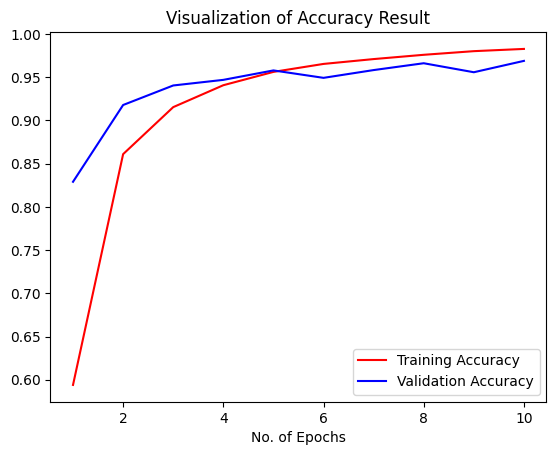

In [30]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [31]:
class_name = validation_set.class_names

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 328s 19ms/step


In [42]:
y_pred,y_pred.shape

(array([[1.0000000e+00, 8.3730696e-12, 3.5171920e-13, ..., 4.9027698e-18,
         5.7369092e-17, 3.0058341e-16],
        [1.0000000e+00, 2.3275273e-12, 6.0541979e-13, ..., 7.5275176e-17,
         5.0058281e-16, 1.4856878e-15],
        [1.0000000e+00, 9.7791952e-17, 6.7193674e-17, ..., 6.4830404e-24,
         8.8677381e-21, 1.4759174e-20],
        ...,
        [1.0649193e-12, 1.4525523e-15, 1.5551250e-11, ..., 6.4566344e-17,
         4.9455336e-15, 9.9998927e-01],
        [1.2509550e-12, 2.0783426e-16, 1.7452000e-12, ..., 6.1403393e-16,
         3.5974404e-14, 1.0000000e+00],
        [2.9164947e-20, 3.8165696e-22, 2.1264332e-19, ..., 2.2320697e-22,
         7.5676240e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [35]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [38]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.98      0.97       504
                                 Apple___Black_rot       0.99      0.95      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.99      0.94      0.96       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.93      1.00      0.96       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.91      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.95      0.

## Confusion Matrix Visualization

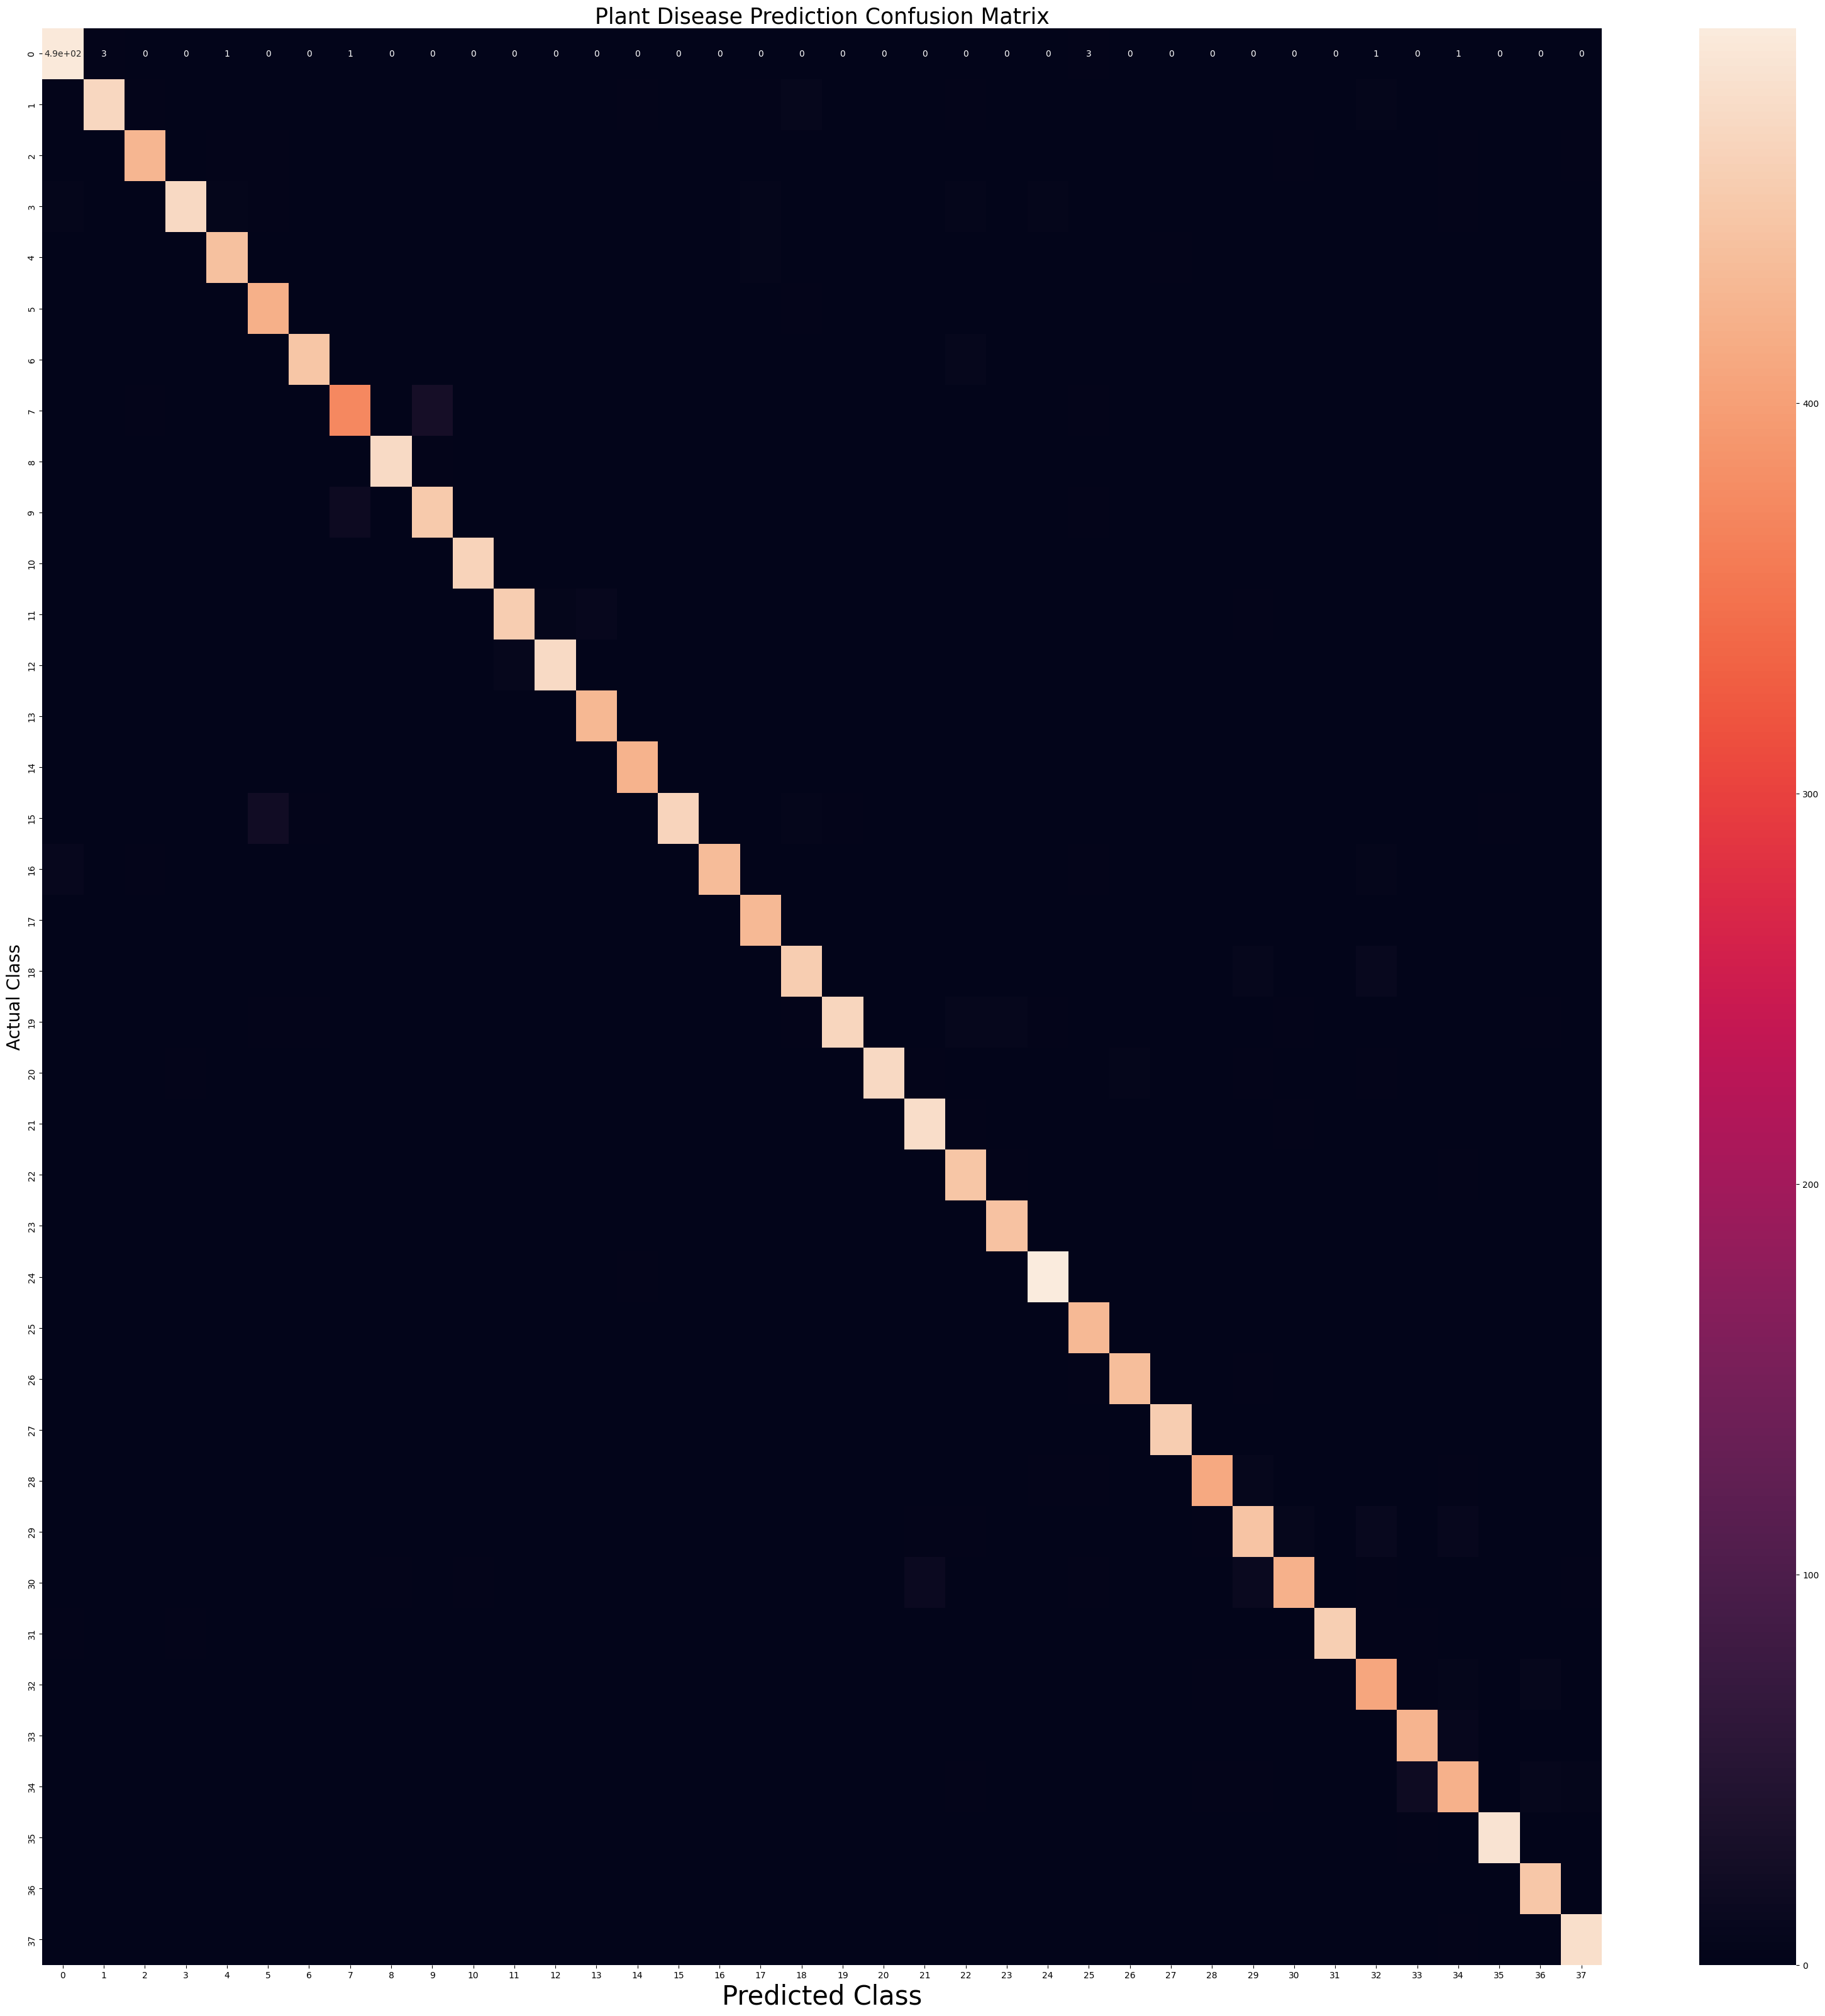

In [43]:

plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 30)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()